In [43]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [44]:
prediction = pd.read_excel('../../../results/prediction_sector.xlsx')
prediction = prediction.dropna(how='all')

# Assuming your dataframe is named df
prediction = prediction.drop([1, 3])

# Assuming df is your DataFrame
prediction.set_index('Sector', inplace=True)
prediction
df=prediction.T

df

Sector,Mobile combustion,Electricity consumption,Solid waste,Residential heating,Commercial housing,Industrial,Agriculture,Wastewater
Hartford,4.26,1.79,0.38,2.07,1.67,0.32,0.17,0.23
Unnamed: 2,4.2,1.84,0.11,2.07,1.61,0.32,0.17,0.19
Unnamed: 3,-1.26,2.96,-69.9,-0.05,-3.81,-2.46,-1.03,-17.05
Unnamed: 4,2.81,1.31,0.0,1.36,1.0,0.35,0.03,0.09
Hartford.1,2.62,1.34,0.0,1.3,0.96,0.35,0.03,0.08
New Haven,-6.73,2.02,0,-4.86,-3.82,1.27,-5.62,-15.35
Unnamed: 7,2.9,1.67,0.29,1.49,0.76,0.11,0.01,0.08
Unnamed: 8,2.71,1.7,0.39,1.5,0.73,0.11,0.01,0.06
Unnamed: 9,-6.73,1.65,32.92,0.24,-3.83,-2.72,-5.62,-15.32
New Haven.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df = df.drop(['Unnamed: 3','New Haven','Unnamed: 9',])
df = df.drop(df.tail(6).index)
# Define the new row index names
new_index_names = ['Hartford, 2021', 'Hartford, 2035', 'New Haven, 2021', 'New Haven, 2035', 'Bridgeport, 2021','Bridgeport, 2035']

# Assign the new row index names to the DataFrame
df.index = new_index_names


df['stationary']=df['Residential heating']+df['Commercial housing']+df['Industrial']
df

Sector,Mobile combustion,Electricity consumption,Solid waste,Residential heating,Commercial housing,Industrial,Agriculture,Wastewater,stationary
"Hartford, 2021",4.26,1.79,0.38,2.07,1.67,0.32,0.17,0.23,4.06
"Hartford, 2035",4.2,1.84,0.11,2.07,1.61,0.32,0.17,0.19,4.0
"New Haven, 2021",2.81,1.31,0.0,1.36,1.0,0.35,0.03,0.09,2.71
"New Haven, 2035",2.62,1.34,0.0,1.3,0.96,0.35,0.03,0.08,2.61
"Bridgeport, 2021",2.9,1.67,0.29,1.49,0.76,0.11,0.01,0.08,2.36
"Bridgeport, 2035",2.71,1.7,0.39,1.5,0.73,0.11,0.01,0.06,2.34


In [46]:
pre = df.copy()
columns_to_drop = ['Residential heating', 'Commercial housing', 'Industrial']  # List of column names to drop

# Drop the specified columns
pre= pre.drop(columns=columns_to_drop)
pre['Total']=pre.iloc[:, :].sum(axis=1)
pre

Sector,Mobile combustion,Electricity consumption,Solid waste,Agriculture,Wastewater,stationary,Total
"Hartford, 2021",4.26,1.79,0.38,0.17,0.23,4.06,10.89
"Hartford, 2035",4.2,1.84,0.11,0.17,0.19,4.0,10.51
"New Haven, 2021",2.81,1.31,0.0,0.03,0.09,2.71,6.95
"New Haven, 2035",2.62,1.34,0.0,0.03,0.08,2.61,6.68
"Bridgeport, 2021",2.9,1.67,0.29,0.01,0.08,2.36,7.31
"Bridgeport, 2035",2.71,1.7,0.39,0.01,0.06,2.34,7.21


In [47]:
# Define the desired order of the index names
desired_order = ['Mobile combustion', 'Electricity consumption', 'stationary', 'Solid waste', 'Wastewater', 'Agriculture', 'Total']

# Rearrange the columns according to the desired order of the index names
pre = pre.reindex(desired_order, axis=1)
pre

Sector,Mobile combustion,Electricity consumption,stationary,Solid waste,Wastewater,Agriculture,Total
"Hartford, 2021",4.26,1.79,4.06,0.38,0.23,0.17,10.89
"Hartford, 2035",4.2,1.84,4.0,0.11,0.19,0.17,10.51
"New Haven, 2021",2.81,1.31,2.71,0.0,0.09,0.03,6.95
"New Haven, 2035",2.62,1.34,2.61,0.0,0.08,0.03,6.68
"Bridgeport, 2021",2.9,1.67,2.36,0.29,0.08,0.01,7.31
"Bridgeport, 2035",2.71,1.7,2.34,0.39,0.06,0.01,7.21


In [48]:
pre['mobile']=pre['Mobile combustion']/pre['Total']
pre['elec']=pre['Electricity consumption']/pre['Total']
pre['station']=pre['stationary']/pre['Total']
pre['solid']=pre['Solid waste']/pre['Total']
pre['waste']=pre['Wastewater']/pre['Total']
pre['agri']=pre['Agriculture']/pre['Total']

In [49]:
pre

Sector,Mobile combustion,Electricity consumption,stationary,Solid waste,Wastewater,Agriculture,Total,mobile,elec,station,solid,waste,agri
"Hartford, 2021",4.26,1.79,4.06,0.38,0.23,0.17,10.89,0.391185,0.164371,0.372819,0.034894,0.02112,0.015611
"Hartford, 2035",4.2,1.84,4.0,0.11,0.19,0.17,10.51,0.399619,0.175071,0.38059,0.010466,0.018078,0.016175
"New Haven, 2021",2.81,1.31,2.71,0.0,0.09,0.03,6.95,0.404317,0.188489,0.389928,0.0,0.01295,0.004317
"New Haven, 2035",2.62,1.34,2.61,0.0,0.08,0.03,6.68,0.392216,0.200599,0.390719,0.0,0.011976,0.004491
"Bridgeport, 2021",2.9,1.67,2.36,0.29,0.08,0.01,7.31,0.396717,0.228454,0.322845,0.039672,0.010944,0.001368
"Bridgeport, 2035",2.71,1.7,2.34,0.39,0.06,0.01,7.21,0.375867,0.235784,0.324549,0.054092,0.008322,0.001387


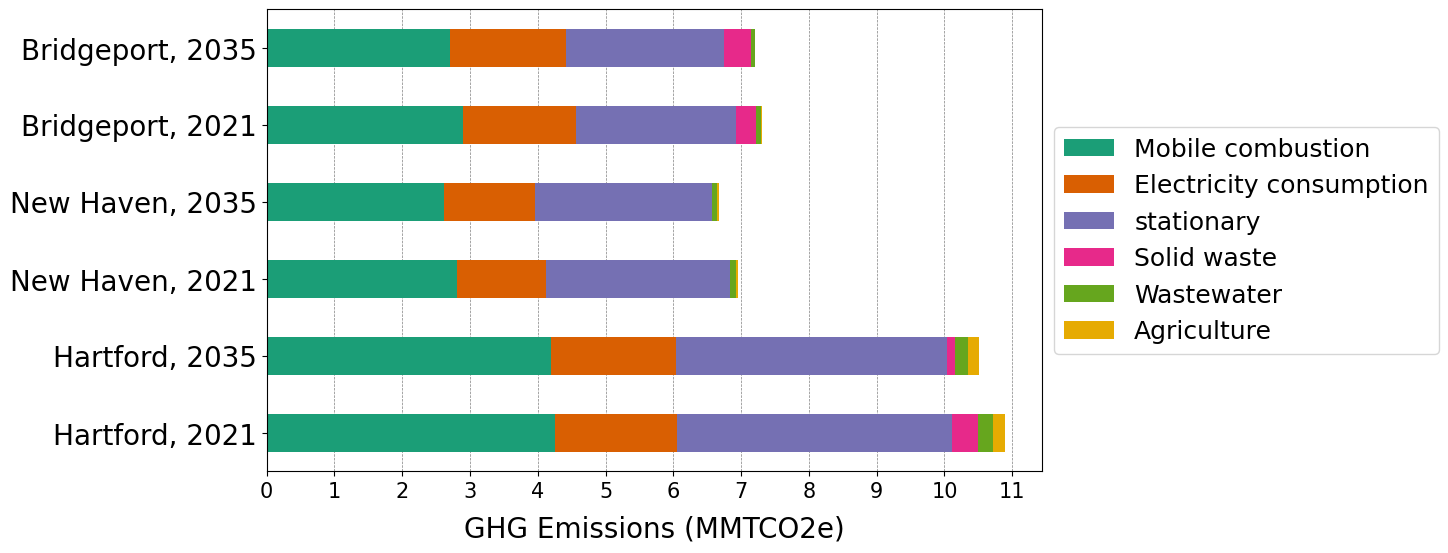

In [50]:
# Color settings
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']


# Plot
ax = pre.iloc[:,:-7].plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    
plt.savefig('../../../figures/sector_emissions.png', dpi=600, bbox_inches='tight')

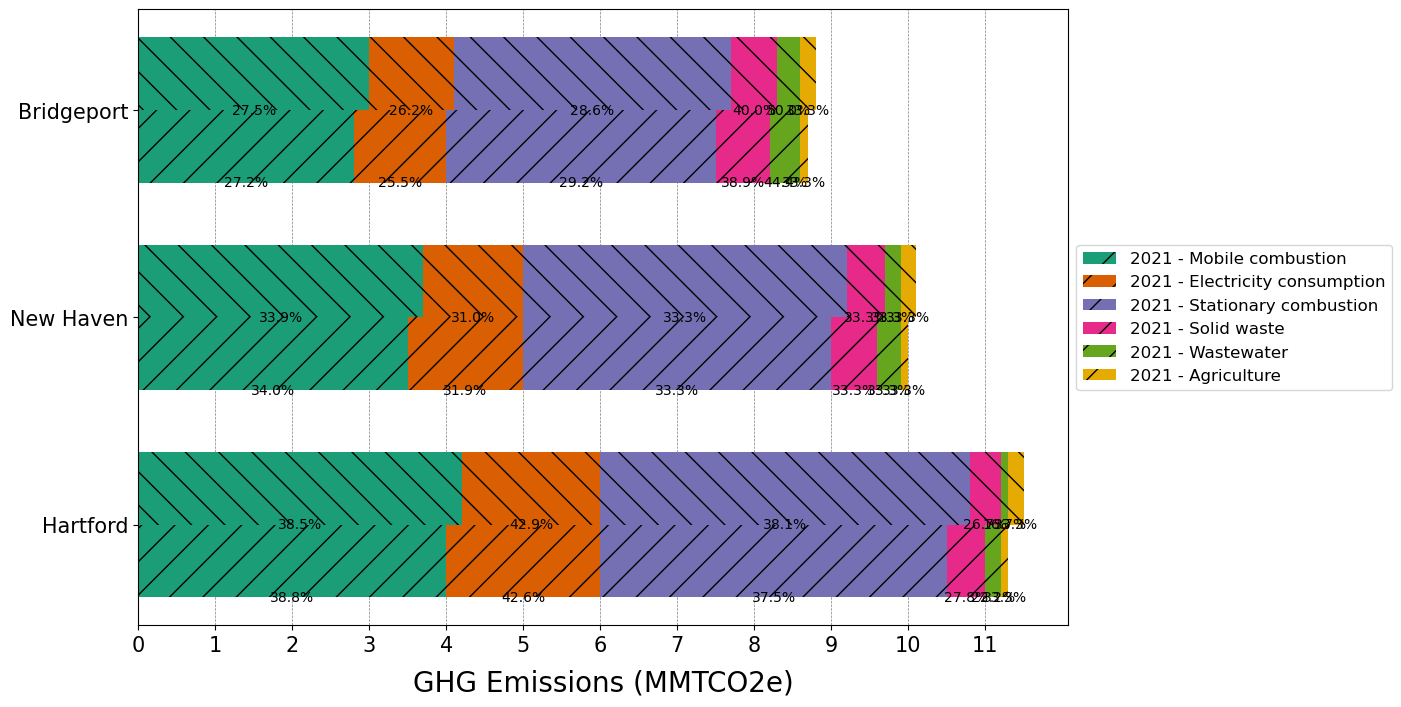

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Sample DataFrame (replace this with your actual data)
data = {
    'Region': ['Hartford', 'Hartford', 'New Haven', 'New Haven', 'Bridgeport', 'Bridgeport'],
    'Year': ['2021', '2035', '2021', '2035', '2021', '2035'],
    'Mobile combustion': [4.0, 4.2, 3.5, 3.7, 2.8, 3.0],
    'Electricity consumption': [2.0, 1.8, 1.5, 1.3, 1.2, 1.1],
    'Stationary combustion': [4.5, 4.8, 4.0, 4.2, 3.5, 3.6],
    'Solid waste': [0.5, 0.4, 0.6, 0.5, 0.7, 0.6],
    'Wastewater': [0.2, 0.1, 0.3, 0.2, 0.4, 0.3],
    'Agriculture': [0.1, 0.2, 0.1, 0.2, 0.1, 0.2]
}

df = pd.DataFrame(data)

# Define colors and hatch patterns
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
hatches = ['/', '\\']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the positions
bar_width = 0.35
positions = np.arange(len(df['Region'].unique()))

# Plot bars
for i, year in enumerate(df['Year'].unique()):
    subset = df[df['Year'] == year]
    bottoms = np.zeros(len(subset))
    for j, col in enumerate(df.columns[2:]):
        values = subset[col].values
        bars = ax.barh(positions + i * bar_width, values, bar_width, left=bottoms, color=colors[j], hatch=hatches[i], label=f'{year} - {col}' if i == 0 else "")
        bottoms += values

        # Annotate with percentage
        total = values.sum()
        for k, v in enumerate(values):
            percentage = f'{(v / total) * 100:.1f}%'
            ax.text(bottoms[k] - v / 2, k + i * bar_width - bar_width / 2, percentage, va='center', ha='center', fontsize=10, color='black')

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.set_yticks(positions + bar_width / 2)
ax.set_yticklabels(df['Region'].unique(), fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.set_xticks(range(0, 12, 1))

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Save the plot
plt.savefig('../../../figures/sector_emissions.png', dpi=600, bbox_inches='tight')
plt.show()


In [52]:
pre =pre.iloc[:, :-7]
pre.reset_index(inplace=True)
pre.rename(columns={'index': 'Sector'}, inplace=True)

# Assign numerical values to the row index
pre.index = range(1, len(pre) + 1)

pre.index.name = None

# Change the index to start from 0 instead of 1
pre.index = range(len(pre))
pre

Sector,Sector,Mobile combustion,Electricity consumption,stationary,Solid waste,Wastewater,Agriculture
0,"Hartford, 2021",4.26,1.79,4.06,0.38,0.23,0.17
1,"Hartford, 2035",4.2,1.84,4.0,0.11,0.19,0.17
2,"New Haven, 2021",2.81,1.31,2.71,0.0,0.09,0.03
3,"New Haven, 2035",2.62,1.34,2.61,0.0,0.08,0.03
4,"Bridgeport, 2021",2.9,1.67,2.36,0.29,0.08,0.01
5,"Bridgeport, 2035",2.71,1.7,2.34,0.39,0.06,0.01


In [53]:
# Split the 'Sector' column into 'Region' and 'Year'
pre[['Region', 'Year']] = pre['Sector'].str.split(', ', expand=True)

# Drop the 'Sector' and 'Total' columns
pre = pre.drop(columns=['Sector'])

# Convert 'Year' column to integer type
pre['Year'] = pre['Year'].astype(int)

# Rename the columns
pre = pre.rename(columns={
    'Mobile combustion': 'Mobile combustion',
    'Electricity consumption': 'Electricity consumption',
    'stationary': 'Stationary combustion',
    'Solid waste': 'Solid waste',
    'Wastewater': 'Wastewater treatment',
    'Agriculture': 'Agriculture'
})

pre

Sector,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Region,Year
0,4.26,1.79,4.06,0.38,0.23,0.17,Hartford,2021
1,4.2,1.84,4.0,0.11,0.19,0.17,Hartford,2035
2,2.81,1.31,2.71,0.0,0.09,0.03,New Haven,2021
3,2.62,1.34,2.61,0.0,0.08,0.03,New Haven,2035
4,2.9,1.67,2.36,0.29,0.08,0.01,Bridgeport,2021
5,2.71,1.7,2.34,0.39,0.06,0.01,Bridgeport,2035


In [54]:
# Swap rows 0 and 2
pre.iloc[[0, 2]] = pre.iloc[[2, 0]]

# Swap rows 1 and 3
pre.iloc[[1, 3]] = pre.iloc[[3, 1]]

In [55]:
pre

Sector,Mobile combustion,Electricity consumption,Stationary combustion,Solid waste,Wastewater treatment,Agriculture,Region,Year
0,2.81,1.31,2.71,0.0,0.09,0.03,New Haven,2021
1,2.62,1.34,2.61,0.0,0.08,0.03,New Haven,2035
2,4.26,1.79,4.06,0.38,0.23,0.17,Hartford,2021
3,4.2,1.84,4.0,0.11,0.19,0.17,Hartford,2035
4,2.9,1.67,2.36,0.29,0.08,0.01,Bridgeport,2021
5,2.71,1.7,2.34,0.39,0.06,0.01,Bridgeport,2035


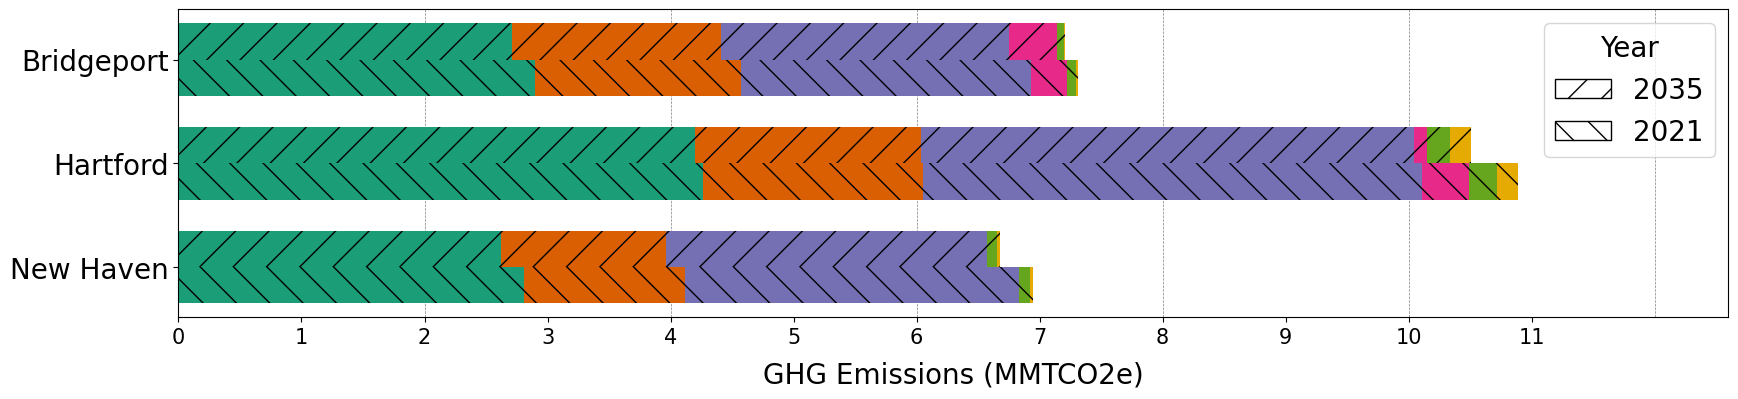

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

# Define colors and hatch patterns
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
hatches = ['\\', '/']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 4))

# Calculate the positions
bar_width = 0.35
positions = np.arange(len(pre['Region'].unique()))

# Plot bars
for i, year in enumerate(pre['Year'].unique()):
    subset = pre[pre['Year'] == year].copy()  # Make a copy of the subset
    subset = subset.drop(columns=['Year', 'Region'])  # Exclude non-numeric columns
    bottoms = np.zeros(len(subset))
    for j, col in enumerate(subset.columns):
        values = subset[col].values.astype(float)  # Convert values to float
        bars = ax.barh(positions + i * bar_width, values, bar_width, left=bottoms, color=colors[j], hatch=hatches[i], label=col if i == 0 else "")
        bottoms += values

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.set_yticks(positions + bar_width / 2)
ax.set_yticklabels(pre['Region'].unique(), fontsize=20)

# Simplified legend for sectors
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
sector_handles = [handle for label, handle in by_label.items() if label in pre.columns[2:]]
sector_labels = [label for label in by_label.keys() if label in pre.columns[2:]]

# Reverse the order of sector legend labels
sector_handles = sector_handles[::-1]
sector_labels = sector_labels[::-1]

sector_legend = ax.legend(sector_handles, sector_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title='Sectors')
ax.add_artist(sector_legend)

# Legend for years
year_patches = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=h, label=year) for h, year in zip(hatches, pre['Year'].unique())]

# Reverse the order of year legend labels
year_patches = year_patches[::-1]

legend = plt.legend(handles=year_patches, loc='upper right', fontsize=20, title='Year')
plt.setp(legend.get_title(), fontsize='20')  # Set font size of legend title

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

ax.tick_params(axis='x', labelsize=15)
ax.set_xticks(range(0, 12, 1))

# Save the plot
plt.savefig('../../../figures/Report-images/sector_emissions.jpeg', format='jpeg', dpi=600, bbox_inches='tight')


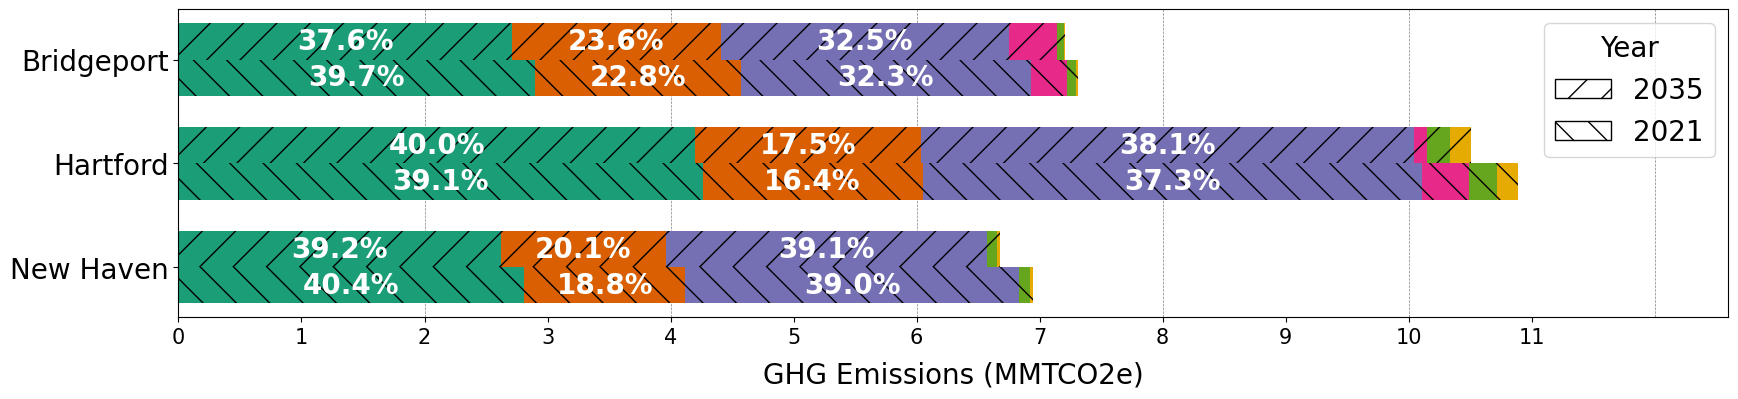

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

# Define colors and hatch patterns
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
hatches = ['\\', '/']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 4))

# Calculate the positions
bar_width = 0.35
positions = np.arange(len(pre['Region'].unique()))

# Plot bars
for i, year in enumerate(pre['Year'].unique()):
    subset = pre[pre['Year'] == year].copy()  # Make a copy of the subset
    subset = subset.drop(columns=['Year', 'Region'])  # Exclude non-numeric columns
    bottoms = np.zeros(len(subset))
    for j, col in enumerate(subset.columns):
        values = subset[col].values.astype(float)  # Convert values to float
        bars = ax.barh(positions + i * bar_width, values, bar_width, left=bottoms, color=colors[j], hatch=hatches[i], label=col if i == 0 else "")
        
        # Annotate the first three segments with percentages
        if j < 3:
            for k, value in enumerate(values):
                total = sum(subset.iloc[k])
                percentage = (value / total) * 100
                ax.annotate(f'{percentage:.1f}%', 
                            xy=(bottoms[k] + value / 2, positions[k] + i * bar_width),
                            ha='center', va='center', fontsize=20, color='white', weight='bold')
        
        bottoms += values

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.set_yticks(positions + bar_width / 2)
ax.set_yticklabels(pre['Region'].unique(), fontsize=20)

# Simplified legend for sectors
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
sector_handles = [handle for label, handle in by_label.items() if label in pre.columns[2:]]
sector_labels = [label for label in by_label.keys() if label in pre.columns[2:]]

# Reverse the order of sector legend labels
sector_handles = sector_handles[::-1]
sector_labels = sector_labels[::-1]

sector_legend = ax.legend(sector_handles, sector_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title='Sectors')
ax.add_artist(sector_legend)

# Legend for years
year_patches = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=h, label=year) for h, year in zip(hatches, pre['Year'].unique())]

# Reverse the order of year legend labels
year_patches = year_patches[::-1]

legend = plt.legend(handles=year_patches, loc='upper right', fontsize=20, title='Year')
plt.setp(legend.get_title(), fontsize='20')  # Set font size of legend title

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

ax.tick_params(axis='x', labelsize=15)
ax.set_xticks(range(0, 12, 1))

# Save the plot
plt.savefig('../../../figures/Report-images/sector_emissions.jpeg', format='jpeg', dpi=600, bbox_inches='tight')


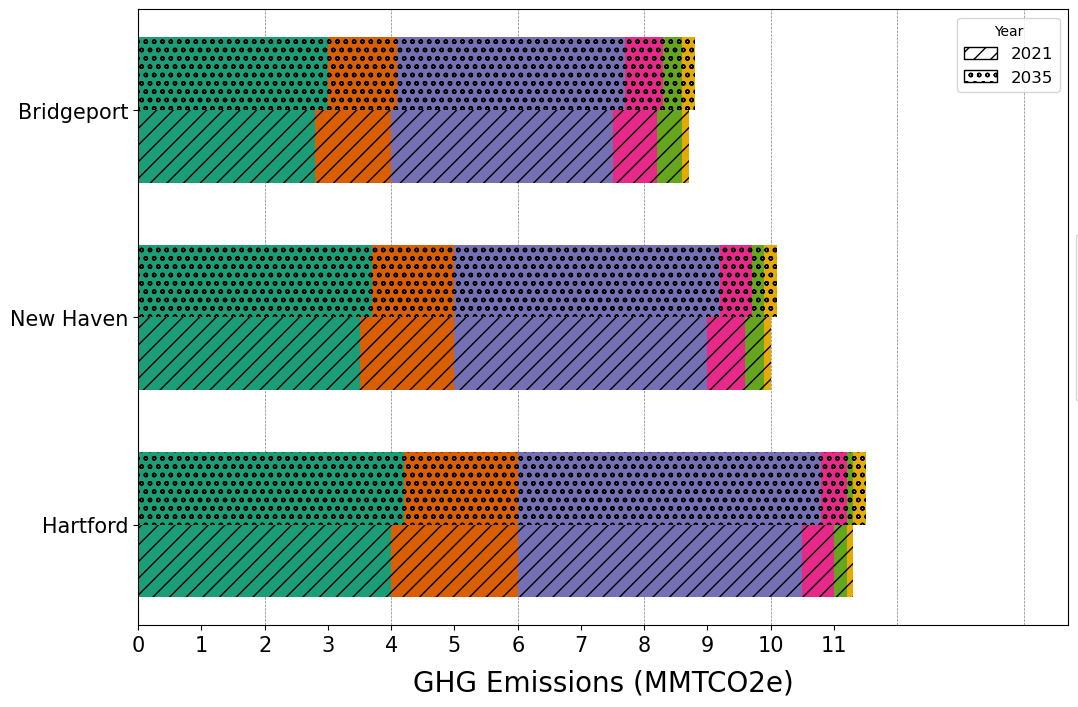

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'Region': ['Hartford', 'Hartford', 'New Haven', 'New Haven', 'Bridgeport', 'Bridgeport'],
    'Year': ['2021', '2035', '2021', '2035', '2021', '2035'],
    'Mobile combustion': [4.0, 4.2, 3.5, 3.7, 2.8, 3.0],
    'Electricity consumption': [2.0, 1.8, 1.5, 1.3, 1.2, 1.1],
    'Stationary combustion': [4.5, 4.8, 4.0, 4.2, 3.5, 3.6],
    'Solid waste': [0.5, 0.4, 0.6, 0.5, 0.7, 0.6],
    'Wastewater': [0.2, 0.1, 0.3, 0.2, 0.4, 0.3],
    'Agriculture': [0.1, 0.2, 0.1, 0.2, 0.1, 0.2]
}

df = pd.DataFrame(data)

# Define colors and hatch patterns
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
hatches = ['//', 'oo']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the positions
bar_width = 0.35
positions = np.arange(len(df['Region'].unique()))

# Plot bars
for i, year in enumerate(df['Year'].unique()):
    subset = df[df['Year'] == year]
    bottoms = np.zeros(len(subset))
    for j, col in enumerate(df.columns[2:]):
        values = subset[col].values
        bars = ax.barh(positions + i * bar_width, values, bar_width, left=bottoms, color=colors[j], hatch=hatches[i], label=col if i == 0 else "")
        bottoms += values

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.set_yticks(positions + bar_width / 2)
ax.set_yticklabels(df['Region'].unique(), fontsize=15)

# Simplified legend for sectors
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
sector_handles = [handle for label, handle in by_label.items() if label in df.columns[2:]]
sector_labels = [label for label in by_label.keys() if label in df.columns[2:]]

sector_legend = ax.legend(sector_handles, sector_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title='Sectors')
ax.add_artist(sector_legend)

# Legend for years
year_patches = [mpatches.Patch(facecolor='white', edgecolor='black', hatch=h, label=year) for h, year in zip(hatches, df['Year'].unique())]
plt.legend(handles=year_patches, loc='upper right', fontsize=12, title='Year')

# Draw vertical grid lines manually
for x in ax.get_xticks():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5, zorder=0)

ax.tick_params(axis='x', labelsize=15)
ax.set_xticks(range(0, 12, 1))

# Save the plot
plt.savefig('../../../figures/sector_emissions.png', dpi=600, bbox_inches='tight')
plt.show()


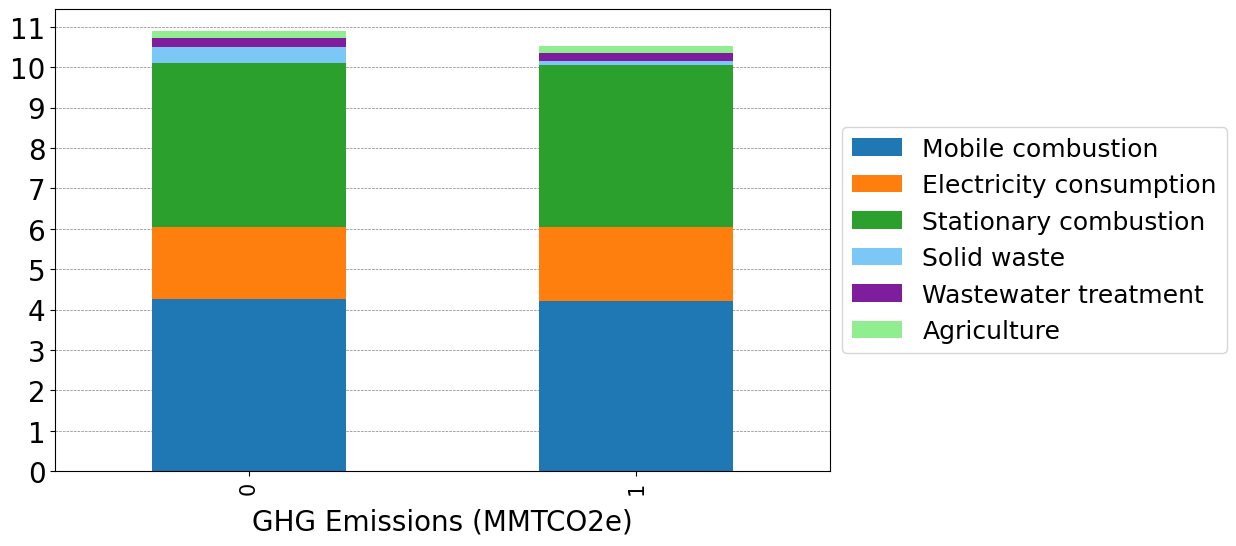

In [26]:
# Color settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7BC8F6', '#7E1E9C', '#90EE90']

# Plot
ax = pre.iloc[0:2,:-1].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_yticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw horizontal grid lines manually
for y in ax.get_yticks():
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)


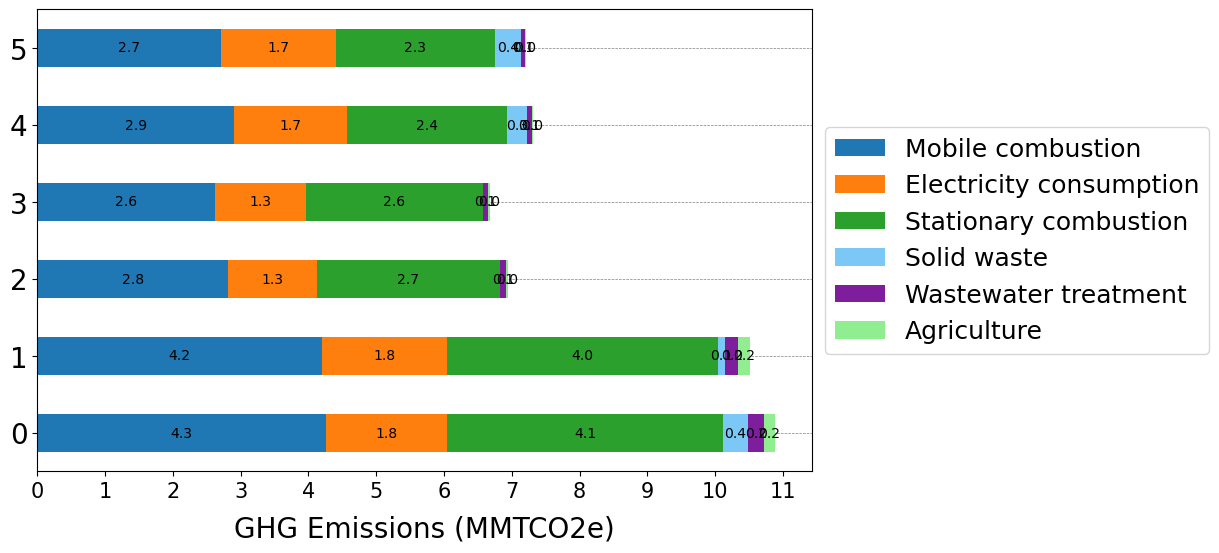

In [27]:
# Color settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7BC8F6', '#7E1E9C', '#90EE90']

# Plot
ax = pre.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, color=colors)

# Customize plot
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20, labelpad=10)
ax.set_ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xticks(range(0, 12, 1))
ax.tick_params(axis='y', labelsize=20)

# Draw horizontal grid lines manually
for y in ax.get_yticks():
    ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Annotate values
for rect in ax.patches:
    # Find where everything is located
    width = rect.get_width()
    height = rect.get_height()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the width of the annotation
    label_text = f'{width:.1f}'
    
    # Coordinate of the label, in this case, the center of the bar
    label_x = x + width / 2
    label_y = y + height / 2

    # Ensure text stays inside the plot
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color='black')

plt.show()
